### 1. Classfication

* ROC Curve

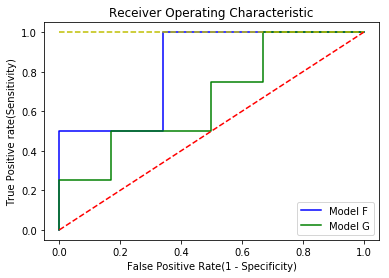

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sens_F = np.array([1.0, 1.0, 1.0, 1.0, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0])
spec_F = np.array([0.0, 0.16, 0.5, 0.66, 0.66, 0.66, 0.83, 1.0, 1.0, 1.0, 1.0])

sens_G = np.array([1.0, 1.0, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.25, 0.25, 0.0])
spec_G = np.array([0.0, 0.33, 0.33, 0.5, 0.5, 0.66, 0.66, 0.83, 0.83, 1.0, 1.0])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive rate(Sensitivity)')

plt.plot(1-spec_F, sens_F, 'b', label = 'Model F')
plt.plot(1-spec_G, sens_G, 'g', label = 'Model G')

plt.plot([0,1], [1,1], 'y--')
plt.plot([0,1], [0,1], 'r--')

plt.legend(loc='lower right')
plt.show()

* ROC Curve (sklearn)

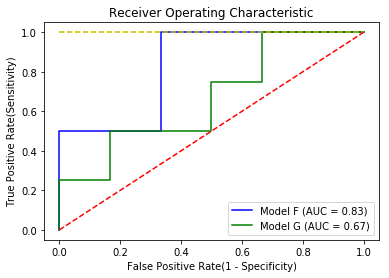

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

class_F = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.15, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.95, 0.95])

class_G = np.array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.65, 0.75, 0.85, 0.95])

false_positive_rate_F, true_positive_rate_F, thresholds_F = roc_curve(class_F, proba_F)
false_positive_rate_G, true_positive_rate_G, thresholds_G = roc_curve(class_G, proba_G)
roc_auc_F = auc(false_positive_rate_F, true_positive_rate_F)
roc_auc_G = auc(false_positive_rate_G, true_positive_rate_G)

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate_F, true_positive_rate_F, 'b', label='Model F (AUC = %0.2f)'% roc_auc_F)
plt.plot(false_positive_rate_G, true_positive_rate_G, 'g', label='Model G (AUC = %0.2f)'% roc_auc_G)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

### 2. Detection

* Precision-Recall Graph

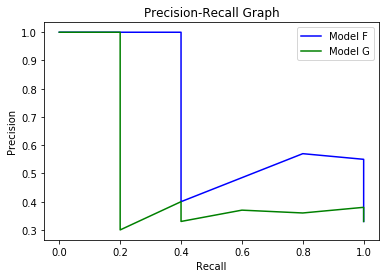

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

precision_F = np.array([0.33, 0.38, 0.45, 0.55, 0.57, 0.40, 0.66, 1.0, 1.0, 1.0, 1.0])
recall_F = np.array([1.0, 1.0, 1.0, 1.0, 0.8, 0.4, 0.4, 0.4, 0.4, 0.2, 0.0])

precision_G = np.array([0.33, 0.38, 0.36, 0.37, 0.33, 0.40, 0.3, 0.5, 1.0, 1.0, 1.0])
recall_G = np.array([1.0, 1.0, 0.8, 0.6, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.0])

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F')
plt.plot(recall_G, precision_G, 'g', label = 'Model G')

plt.legend(loc='upper right')
plt.show()

* Precision-Recall Graph (AP : Average Precision)

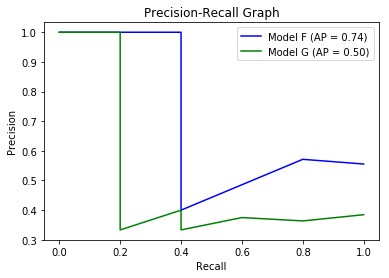

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

class_F = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.35, 0.35, 0.45, 0.45, 0.55, 0.55, 0.65, 0.85, 0.95])

class_G = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.35, 0.45, 0.55, 0.55, 0.65, 0.75, 0.95])

precision_F, recall_F, _ = precision_recall_curve(class_F, proba_F)
precision_G, recall_G, _ = precision_recall_curve(class_G, proba_G)

ap_F = average_precision_score(class_F, proba_F)
ap_G = average_precision_score(class_G, proba_G)

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F (AP = %0.2F)'%ap_F)
plt.plot(recall_G, precision_G, 'g', label = 'Model G (AP = %0.2F)'%ap_G)

plt.legend(loc='upper right')
plt.show()